In [138]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state
from qiskit.quantum_info import partial_trace, Statevector

import matplotlib.pyplot as plt

In [139]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')

ibmqfactory.load_account:WARNING:2021-06-30 14:19:35,765: Credentials are already in use. The existing account in the session will be replaced.


In [140]:
def run_on_hardware(qc, n):
    from qiskit.providers.ibmq import least_busy
    from qiskit.tools.monitor import job_monitor
    backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= n and
                                       not b.configuration().simulator and b.status().operational==True))
    print("Running on backend:", backend)
    t_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(t_qc)
    job_monitor(job)
    exp_result = job.result()
    exp_counts = exp_result.get_counts(qc)
    print(exp_counts)
    return exp_counts

# Bell pairs and Quantum Teleportation

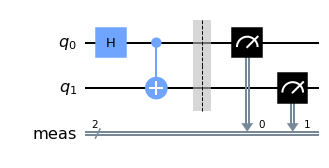

In [142]:
qc0 = QuantumCircuit(2)
qc0.h(0)
qc0.cx(0,1)
state = Statevector.from_instruction(qc0)
# plot_state_qsphere(state)
qc0.measure_all()
qc0.draw(output="mpl")
# plt.show()

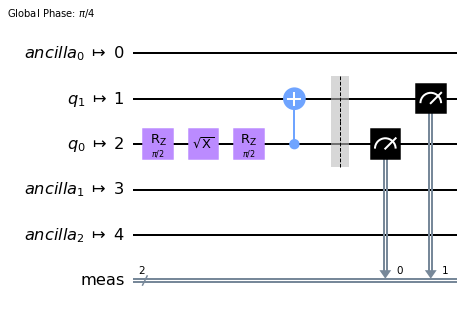

In [143]:
t_qc = transpile(qc0, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_lima
Job Status: job has successfully run
{'00': 493, '01': 15, '10': 16, '11': 500}


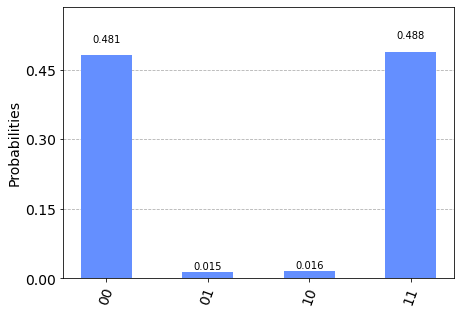

In [144]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

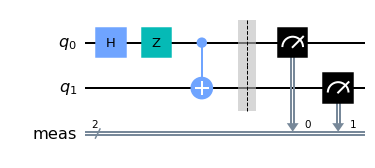

In [145]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.z(0)
# qc1.h(0)
# qc1.h(0)
qc1.cx(0,1)
state = Statevector.from_instruction(qc1)
# plot_state_qsphere(state)
qc1.measure_all()
qc1.draw(output="mpl")
# plt.show()

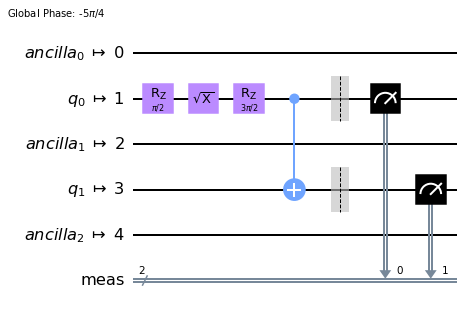

In [146]:
t_qc = transpile(qc1, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 515, '01': 28, '10': 58, '11': 423}


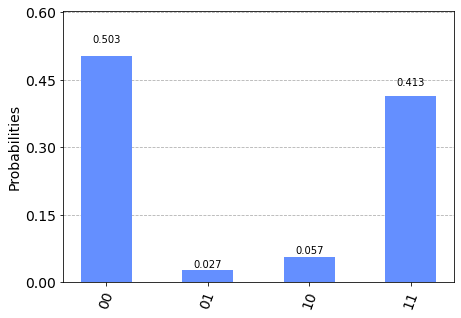

In [148]:
counts = run_on_hardware(t_qc, 3)
plot_histogram(counts)

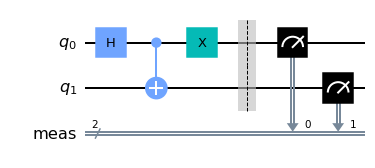

In [149]:
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)
qc2.x(0)
state = Statevector.from_instruction(qc2)
# plot_state_qsphere(state)
qc2.measure_all()
qc2.draw(output="mpl")
# plt.show()

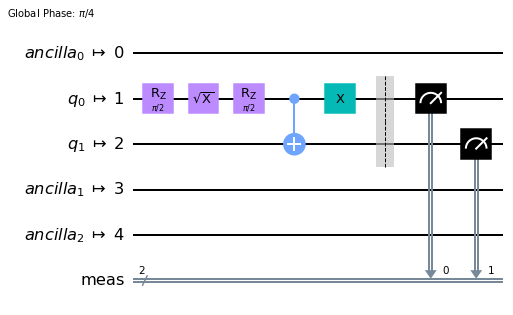

In [150]:
t_qc = transpile(qc2, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 74, '01': 433, '10': 507, '11': 10}


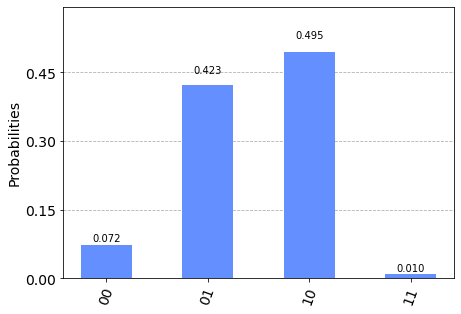

In [151]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

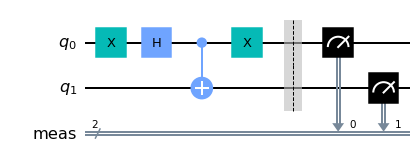

In [153]:
qc3 = QuantumCircuit(2)
qc3.x(0)
qc3.h(0)
qc3.cx(0,1)
qc3.x(0)
state = Statevector.from_instruction(qc3)
# plot_state_qsphere(state)
qc3.measure_all()
qc3.draw(output="mpl")

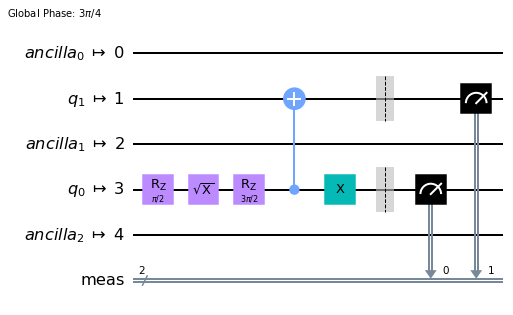

In [154]:
t_qc = transpile(qc3, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 62, '01': 509, '10': 438, '11': 15}


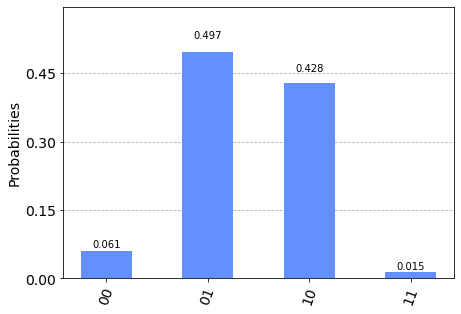

In [155]:
counts = run_on_hardware(t_qc, 2)
plot_histogram(counts)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


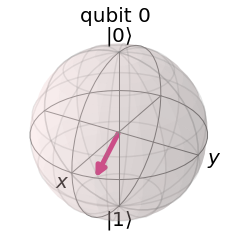

In [105]:
Alice = QuantumRegister(2)
Bob = QuantumRegister(1)
mx = ClassicalRegister(1)
mz = ClassicalRegister(1)
qc = QuantumCircuit(Alice, Bob, mx,mz)

psi = random_state(1)
plot_bloch_multivector(psi)

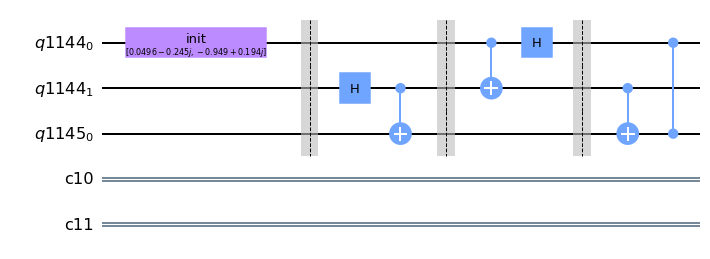

In [106]:
init_gate = Initialize(psi)
init_gate.label = "init"

qc.append(init_gate, [0])
qc.barrier()

qc.h(Alice[1])
qc.cx(Alice[1],Bob)
qc.barrier()
qc.cx(Alice[0],Alice[1])
qc.h(Alice[0])
qc.barrier()
qc.cx(Alice[1],Bob)
qc.cz(Alice[0],Bob)
qc.draw(output="mpl")

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


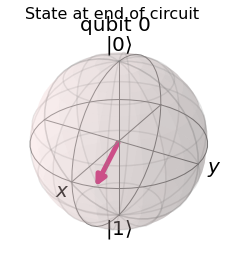

In [110]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
out_vector = job.result().get_statevector()
plot_bloch_multivector(partial_trace(out_vector,[0,1]),title="State at end of circuit")

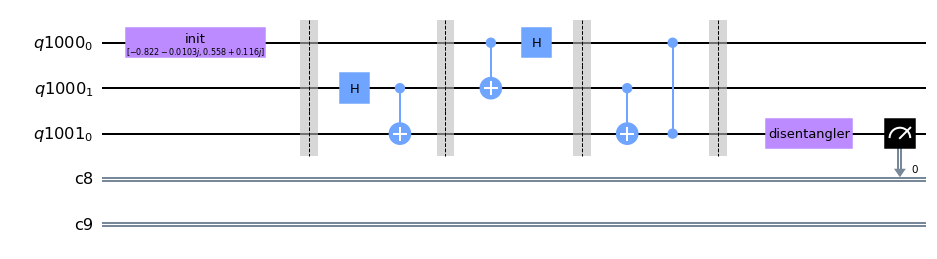

In [100]:
inverse_init_gate = init_gate.gates_to_uncompute()
qc.barrier()
qc.append(inverse_init_gate, Bob)
qc.measure(Bob, mx)
qc.draw()

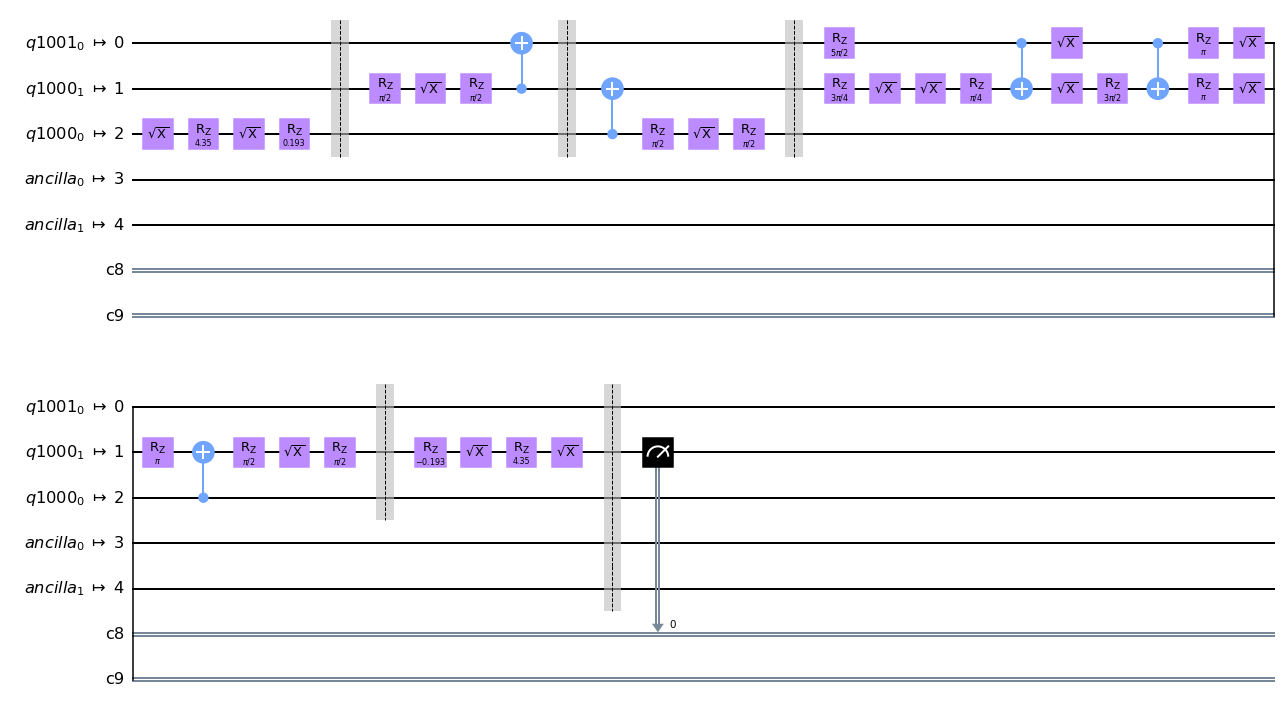

In [101]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_lima
Job Status: job has successfully run
{'0 0': 951, '0 1': 73}


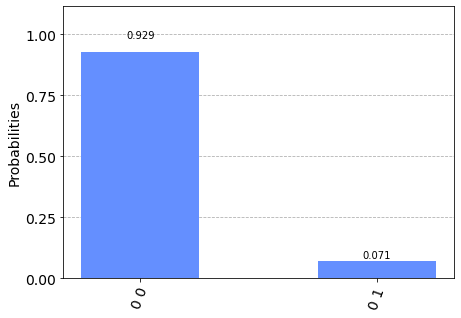

In [51]:
counts = run_on_hardware(qc, 3)
plot_histogram(counts)

# Superdense Coding

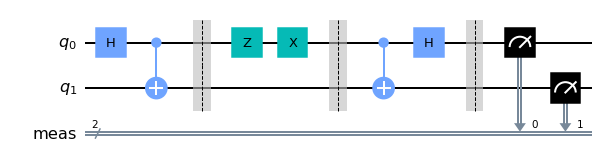

In [157]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
message = "11"
if message == "01":
    qc.z(0)
elif message == "10":
    qc.x(0)
elif message == "11":
    qc.z(0)
    qc.x(0)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure_all()
qc.draw()

{'11': 1024}


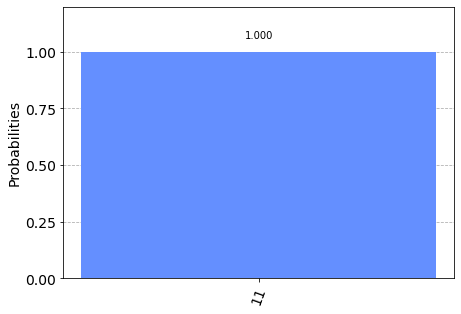

In [158]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

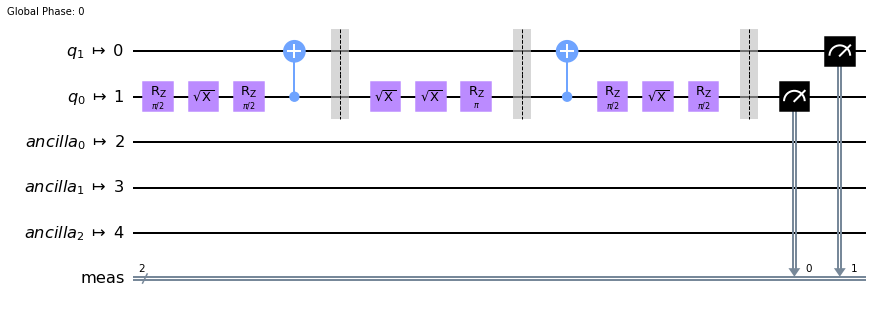

In [159]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

Running on backend: ibmq_belem
Job Status: job has successfully run
{'00': 23, '01': 72, '10': 144, '11': 785}


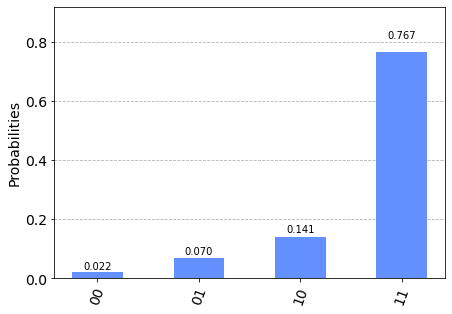

In [160]:
counts = run_on_hardware(qc, 2)
plot_histogram(counts)

# Oracles and Deutsch-Josza Algorithm

In [161]:
n = 4
constant = 1
b_bitstring = "1010"
balanced = QuantumCircuit(n+1)
const = QuantumCircuit(n+1)
if constant:
    const.x(n)
else:
    pass

for index, i in enumerate(b_bitstring):
    if i=="1":
        balanced.x(index)
    balanced.cx(index, n)
    if i=="1":
        balanced.x(index)
    
print(const)
print(balanced)

          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
     ┌───┐     ┌───┐          
q_0: ┤ X ├──■──┤ X ├──────────
     └───┘  │  └───┘          
q_1: ───────┼────■────────────
     ┌───┐  │    │       ┌───┐
q_2: ┤ X ├──┼────┼────■──┤ X ├
     └───┘  │    │    │  └───┘
q_3: ───────┼────┼────┼────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_4: ─────┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘


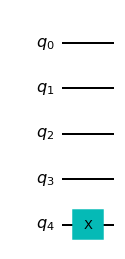

In [111]:
const.draw()

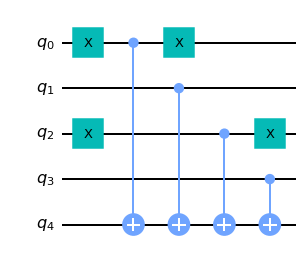

In [112]:
balanced.draw()

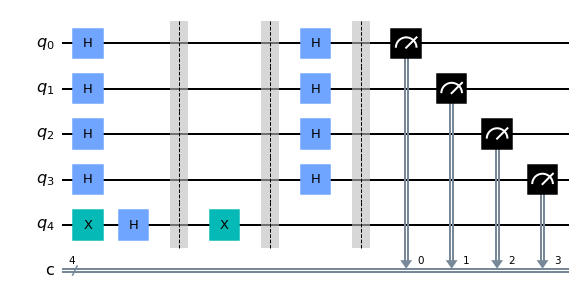

In [162]:
oracle = 1 # 0 for balanced, 1 for constant
qc = QuantumCircuit(n+1, n)
qc.x(n)
qc.h(range(n+1))
qc.barrier()
if oracle:
    qc += const
else:
    qc += balanced
qc.barrier()
qc.h(range(n))
qc.barrier()
qc.measure(range(n), range(n))
qc.draw()

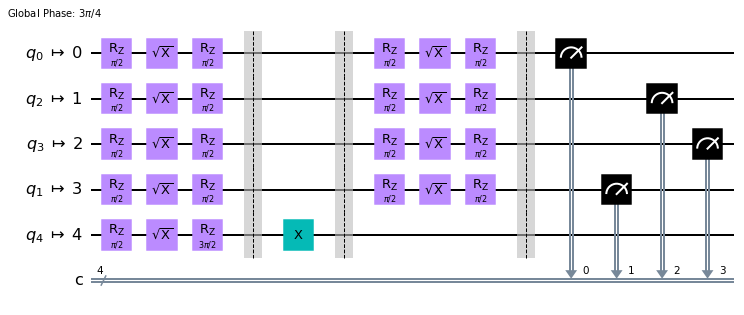

In [163]:
t_qc = transpile(qc, backend, optimization_level=3)
t_qc.draw()

{'0000': 1024}


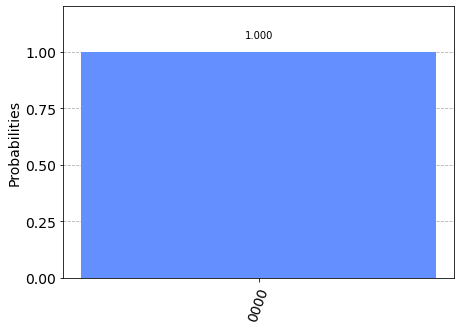

In [164]:
aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(qc).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

Running on backend: ibmq_lima
Job Status: job has successfully run
{'0000': 16, '0001': 11, '0010': 17, '0011': 22, '0100': 10, '0101': 37, '0110': 34, '0111': 91, '1000': 10, '1001': 9, '1010': 15, '1011': 29, '1100': 56, '1101': 108, '1110': 125, '1111': 434}


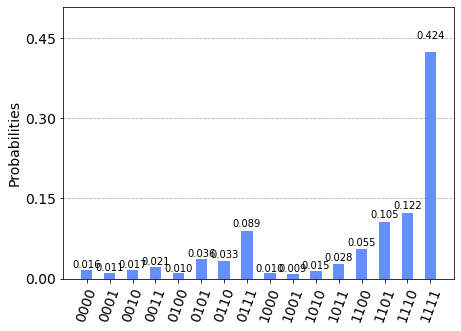

In [115]:
counts = run_on_hardware(qc, n+1)
plot_histogram(counts)